In [1]:
import pandas as pd

data = pd.read_csv('D:/My_files/books/计算机/菜菜的机器学习/03数据预处理和特征工程/Narrativedata.csv'
                   ,index_col=0)

data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [3]:
from sklearn.impute import SimpleImputer

Age = data.loc[:,"Age"].values.reshape(-1,1)
Age[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [nan],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [nan],
       [31.],
       [nan]])

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
imp_mean = SimpleImputer()
imp_median = SimpleImputer(strategy="median")
imp_0 = SimpleImputer(strategy="constant",fill_value=0)

imp_mean = imp_median.fit_transform(Age)
imp_median = imp_median.fit_transform(Age)
imp_0 = imp_0.fit_transform(Age)

In [6]:
imp_0[:20]
imp_median[:20]
imp_mean[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [28.],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [28.],
       [31.],
       [28.]])

In [7]:
data.loc[:,"Age"] = imp_median

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [8]:
Embarked = data.loc[:,"Embarked"].values.reshape(-1,1)

imp_mode = SimpleImputer(strategy="most_frequent")
data.loc[:,"Embarked"] = imp_mode.fit_transform(Embarked)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  891 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [9]:
import numpy as np
import pandas as pd
data = pd.read_csv(r'D:\My_files\books\计算机\菜菜的机器学习\03数据预处理和特征工程\Narrativedata.csv'
                   ,index_col=0)
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())
data.dropna(axis=0,inplace=True)
np.array(data.isnull()).sum()

0

In [10]:
from sklearn.preprocessing import LabelEncoder

y= data.iloc[:,-1]

le = LabelEncoder()
label = le.fit_transform(y)

le.classes_
label

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,

In [11]:
data.head()
data.iloc[:,-1] = LabelEncoder().fit_transform(data.iloc[:,-1])
data

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0
...,...,...,...,...
886,27.0,male,S,0
887,19.0,female,S,2
888,28.0,female,S,0
889,26.0,male,C,1


In [12]:
from sklearn.preprocessing import OrdinalEncoder

data_ = data.copy()

data_.head()

OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [13]:
from sklearn.preprocessing import OneHotEncoder

data.head()
X = data.iloc[:,1:-1]
#
result = OneHotEncoder(categories='auto').fit_transform(X).toarray()
result
# result = enc.transform(X).toarray()
# result

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [14]:
# pd.DataFrame(OneHotEncoder(categories='auto').inverse_transform(result))

enc = OneHotEncoder(categories='auto').fit(X)
enc.get_feature_names()
# result
# result.shape()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [15]:
newdata = pd.concat([data,pd.DataFrame(result)],axis=1)
newdata.head()

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,2.0,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,2.0,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,2.0,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0.0,0.0,1.0,0.0,0.0,1.0


In [16]:
newdata.drop(["Sex","Embarked"],axis=1,inplace=True)
newdata.head()

,Age,Survived,0,1,2,3,4
0,22.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,2.0,1.0,0.0,1.0,0.0,0.0
2,26.0,2.0,1.0,0.0,0.0,0.0,1.0
3,35.0,2.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [17]:
newdata.columns = ["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"]
newdata.head()


,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,2.0,1.0,0.0,1.0,0.0,0.0
2,26.0,2.0,1.0,0.0,0.0,0.0,1.0
3,35.0,2.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [18]:
data_2 = data.copy()

from sklearn.preprocessing import Binarizer

X= data_2.iloc[:,0].values.reshape(-1,1)

transformer = Binarizer(threshold=30).fit_transform(X)
transformer

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [22]:
from sklearn.preprocessing import KBinsDiscretizer

X = data.iloc[:,0].values.reshape(-1,1)
est = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform').fit_transform(X)
set(est.ravel())

est = KBinsDiscretizer(n_bins=3,encode='onehot',strategy='uniform').fit_transform(X)
est.toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [18]:
import pandas as pd
data = pd.read_csv(r'D:\My_files\books\计算机\菜菜的机器学习\03数据预处理和特征工程\digit recognizor.csv')

x = data.iloc[:,1:]
y = data.iloc[:,0]

x.shape
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [3]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
x_var0 = selector.fit_transform(x)
x_var0.shape

(42000, 708)

In [4]:
import numpy as np
x_fsvar = VarianceThreshold(np.median(x.var().values)).fit_transform(x)

x.var().values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.22760590e-01, 2.64689018e+00, 1.11085714e+00, 1.92857143e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.09523810e-03, 5.41186213e-02, 1.28065733e+00, 5.33793150e+00,
       9.74592647e+00, 1.06219147e+01, 2.49289953e+01, 3.37671294e+01,
       3.59425660e+01, 3.49309575e+01, 3.62943342e+01, 3.27911079e+01,
       3.04237672e+01, 2.95547817e+01, 2.00568398e+01, 1.19545659e+01,
       8.60419724e+00, 2.55465685e+00, 1.60530842e+00, 9.29377602e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [5]:
x_bvar = VarianceThreshold(.8*(1-.8)).fit_transform(x)

In [6]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import chi2,SelectKBest

x_fschi = SelectKBest(chi2,k=300).fit_transform(x_fsvar,y)
x_fschi.shape


(42000, 300)

In [37]:
cross_val_score(RFC(n_estimators=10,random_state=0),x_fschi,y,cv=5).mean()

0.9344761904761905

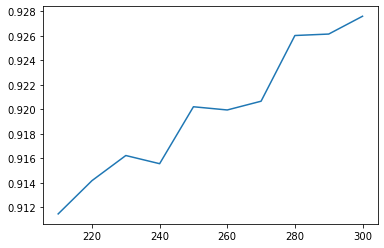

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

score = []
for i in range(300,200,-10):
    x_fschi = SelectKBest(chi2,k=i).fit_transform(x_fsvar,y)
    once = cross_val_score(RFC(n_estimators=8,random_state=0),x_fschi,y,cv=5).mean()
    score.append(once)

plt.plot(range(300,200,-10),score)
plt.show()

In [13]:
chivalue,pvalues_chi = chi2(x_fsvar,y)

In [12]:
chivalue.shape

(392,)

In [14]:
pvalues_chi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()

In [17]:
k

392

In [19]:
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(x_fsvar,y)
k = result.shape[0] - sum(result <= 0)
